In [3]:
import pandas as pd
import geopandas

from shapely.geometry import Point

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-muted')

In [5]:
df = pd.read_json('../data/scores.json', lines=True)

In [6]:
df.head(10)

,ALAND,ALAND_SQMI,ANSICODE,AWATER,AWATER_SQMI,DENSITY,FUNCSTAT,GEOID,HU10,INTPTLAT,INTPTLONG,LSAD,NAME,POP10,USPS
0,83433066,32.214,2408722,5897218,2.277,4502.000280,S,671246,2117,37.098569,-119.326290,57,Shaver Lake CDP,634,CA
1,2812299,1.086,2407524,0,0.000,788.644367,A,2260565,64,32.738101,-91.438126,47,Pioneer village,156,LA
2,9143613,3.530,2410837,0,0.000,1531.211341,A,4842844,997,33.010954,-94.362628,25,Linden city,1988,TX
3,2209039,0.853,2398475,0,0.000,1495.539518,A,1744719,139,40.152591,-91.221571,47,Loraine village,313,IL
4,5946909,2.296,2394336,28667,0.011,1615.991021,A,2931132,1376,36.232528,-89.747362,25,Hayti city,2939,MO
5,15931944,6.151,2412018,524629,0.203,1401.492036,A,4171650,3566,43.388954,-123.322293,25,Sutherlin city,7810,OR
6,996803,0.385,2413346,0,0.000,364.635494,A,874815,151,38.232773,-103.663312,43,Sugar City town,258,CO
7,30527082,11.787,2390597,26533,0.010,7887.074789,A,2436075,18682,39.640182,-77.722691,25,Hagerstown city,39662,MD
8,3719597,1.436,2407244,0,0.000,1866.207091,A,3757860,748,34.826217,-78.025902,43,Rose Hill town,1626,NC
9,6483131,2.503,2407502,3347548,1.292,59332.183954,A,1245175,3935,25.867011,-80.178341,47,Miami Shores village,10493,FL


In [7]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [8]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [9]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [43]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.USPS==state]
    sdf.plot(ax=ax, markersize=sdf['POP10'] / 200, alpha=0.3, c=sdf.DENSITY, cmap='viridis')

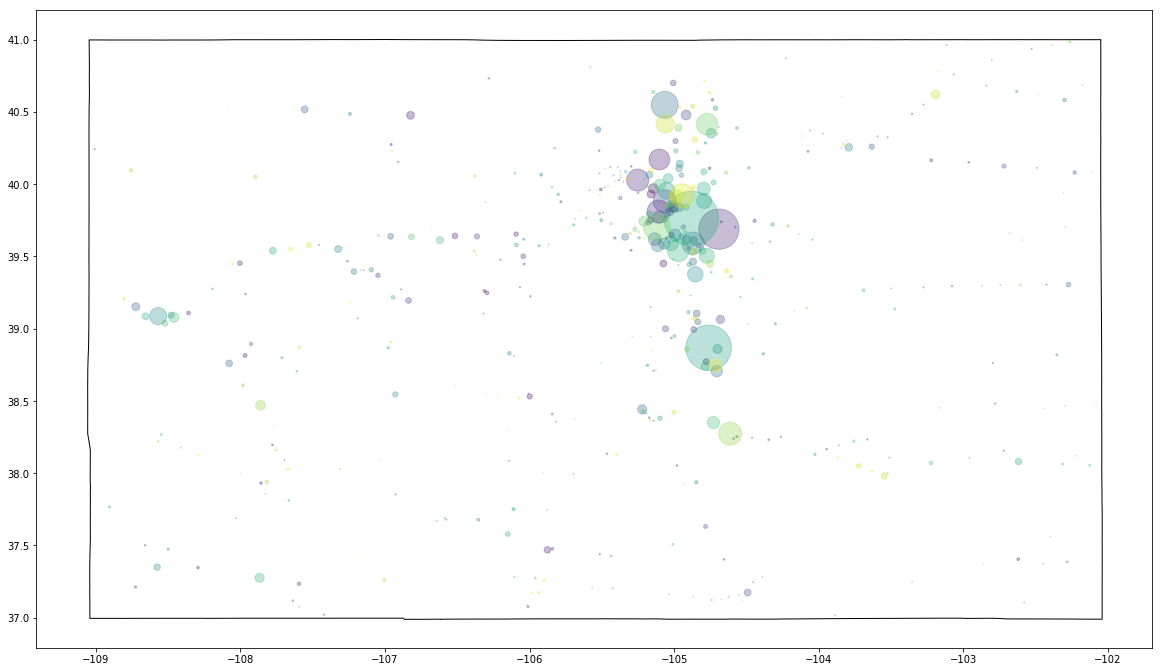

In [44]:
plot_state('CO')

In [38]:
df[df.NAME.str.contains('San Francisco')][['NAME', 'DENSITY']]

,NAME,DENSITY
2807,South San Francisco city,55768.337471
10972,San Francisco city,22683.878272
